# What's up eth ?

In this mini-hackathon project we have used Google's BigQuery to obtain the 16.000 Ethereum wallets with the highest balances, as of June 4th, 2020.

The idea is to do a brief exploration of the data using the common python libraries like pandas and seaborn to visualize the data, and propose a basic dashboard concept.

In [50]:
### Importing libraries
from web3 import Web3
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [18]:
df = pd.read_csv('data/top-eth-wallets-20200604-212329.csv')

In [19]:
df

,address,eth_balance
0,0x742d35cc6634c0532925a3b844bc454e4438f44e,3836061615941836500000001
1,0xdc76cd25977e0a5ae17155770273ad58648900d3,3125760535463887010445000
2,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,2507764425435465820651570
3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2381646713533211711872996
4,0x53d284357ec70ce289d6d64134dfac8e511c8a3d,1378754144654898911481302
...,...,...
15995,0x28c87a829b878bb3d514fd0e89ef9eec1157e4af,401104338000000000000
15996,0xf37b426547a1642d8033324814f0ede3114fc212,401100000000000000000
15997,0xf052a089a9201a8e891a094f3ac7a916d0692c39,401088811000000000000
15998,0xdb259476c3eb906b10cbaada30539181efa75901,401043968196000000000


In [20]:
df.describe()

,address,eth_balance
count,16000,16000
unique,16000,14219
top,0x2276aa4b5248b9dba68dd99982854df7e3625838,1000000000000000000000
freq,1,237


# 💡  New knowledge:
eth_balance is measured in `wei`, which is the ethereum's minimum measurement unit.
Trying to use the `wei` values will cause a `64-bit overflow error`, as seen with the first row of the dataframe
`3836061615941836500000001`


In [21]:
lowest_wallet = df.iloc[-1]
#lowest balance
lb = lowest_wallet.eth_balance
print(f"The wallet with the lowest balance has {lb} wei")
print(f"The balances in the obtained dataset are strings, {type(lb)=}")

The wallet with the lowest balance has 401037450995000000000 wei
The balances in the obtained dataset are strings, type(lb)=<class 'str'>


## Turning `wei` strings into `ether` ints

In [22]:
def wei_str_to_wei_int(wei_str):
    wei_int = int(wei_str)
    return wei_int

In [23]:
df["wei_int"] = df.eth_balance.apply(wei_str_to_wei_int)
df.head()

,address,eth_balance,wei_int
0,0x742d35cc6634c0532925a3b844bc454e4438f44e,3836061615941836500000001,3836061615941836500000001
1,0xdc76cd25977e0a5ae17155770273ad58648900d3,3125760535463887010445000,3125760535463887010445000
2,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,2507764425435465820651570,2507764425435465820651570
3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2381646713533211711872996,2381646713533211711872996
4,0x53d284357ec70ce289d6d64134dfac8e511c8a3d,1378754144654898911481302,1378754144654898911481302


In [24]:
df.wei_int.describe()

count                      16000
unique                     14219
top       1000000000000000000000
freq                         237
Name: wei_int, dtype: object

### Now that we have a colum with `int` values, we can now turn that to `ether`

In [32]:
# Can we calculate how much ether is there in the top ethereum wallet?
highest_wallet_balance = df.wei_int.iloc[0]
max_ether_balance = Web3.fromWei(highest_wallet_balance, 'ether')
print(f"{max_ether_balance=}")
print(f"{type(max_ether_balance)=}")

max_ether_balance=Decimal('3836061.615941836500000001')
type(max_ether_balance)=<class 'decimal.Decimal'>


# Creating an ether column

In [39]:
wei_int_to_eth_dec = lambda wei_int : Web3.fromWei(wei_int, 'ether')
df['ether'] = df.wei_int.apply(wei_int_to_eth_dec)

### Plotting the column

In [60]:
df.ether

0        3836061.615941836500000001
1           3125760.535463887010445
2         2507764.42543546582065157
3        2381646.713533211711872996
4        1378754.144654898911481302
                    ...            
15995                    401.104338
15996                         401.1
15997                    401.088811
15998                 401.043968196
15999                 401.037450995
Name: ether, Length: 16000, dtype: object

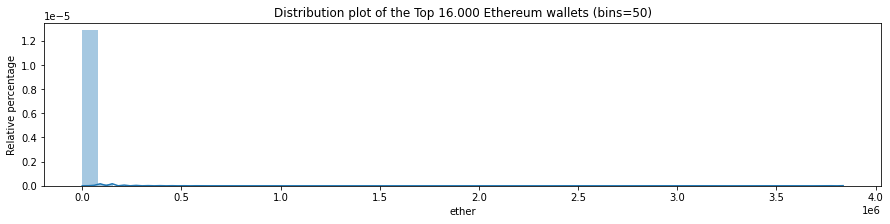

In [87]:
bins=50
f,a = plt.subplots(figsize=(15,3))
a.set_title(f'Distribution plot of the Top 16.000 Ethereum wallets ({bins=})')
a.set_ylabel('Relative percentage')
a.set_xlabel('Amount of ether in the wallet')
sns.distplot(df.ether, ax=a, bins=bins)

# 💡 This first plot is not very helpful, because there is a huge difference between the top wallet and the wallets with the lowest balances

To have a better insight on the data, we will try reducing the number of bins in the distribution plot, and ploting a taller graph.

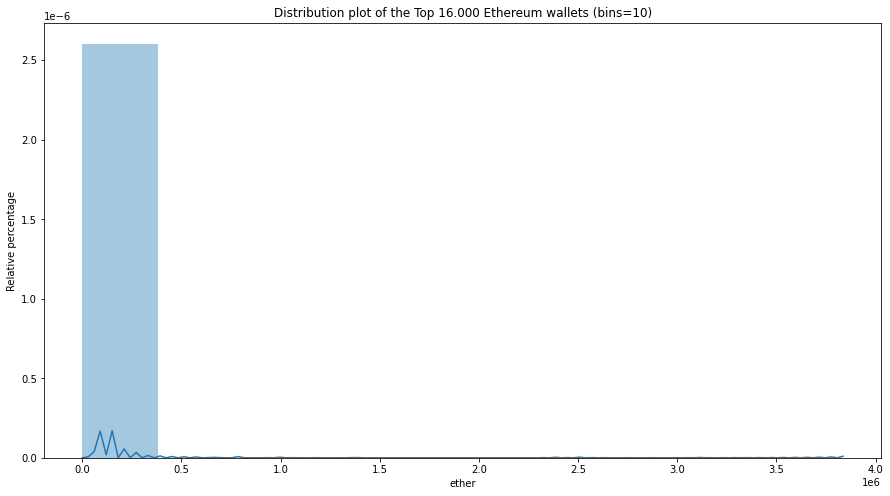

In [95]:
bins = 10
f,a = plt.subplots(figsize=(15,8))
a.set_title(f'Distribution plot of the Top 16.000 Ethereum wallets ({bins=})')
a.set_ylabel('Relative percentage')
a.set_xlabel('Amount of ether in the wallet')
sns.distplot(df.ether, ax=a, bins=bins)

## That's not helping much is it? 
The distribution is very skewed to the left. And our graph cannot represent the data in a way the human eye can interpret it.


**What if we take the lowest `15000` wallets and plot fewer bins,will we see a distribution that is easier to interpret?**

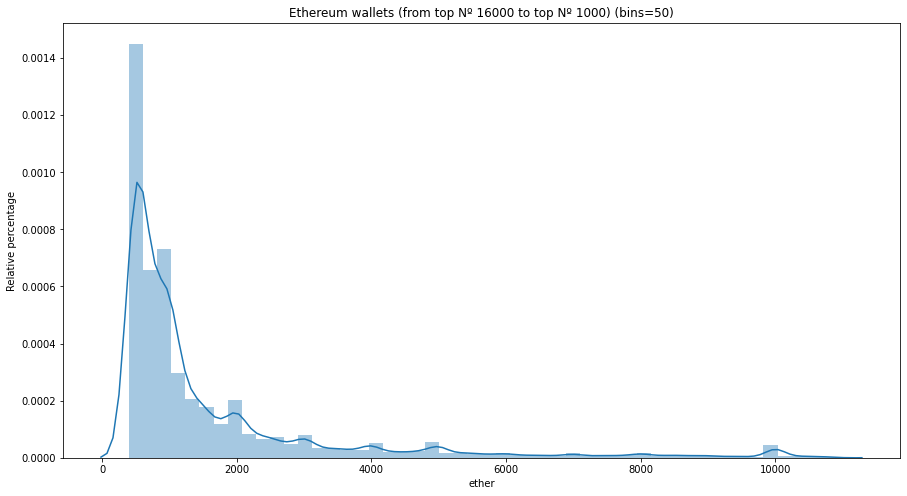

In [97]:
bins = 50
f,a = plt.subplots(figsize=(15,8))
a.set_title(f'Ethereum wallets (from top Nº 16000 to top Nº 1000) ({bins=})')
a.set_ylabel('Relative percentage')
a.set_xlabel('Amount of ether in the wallet')
sns.distplot(df.ether.iloc[-15000:], ax=a, bins=bins)

# Now that is looking better :)
This is something we can work with a little bit more.

## 💡 New knowlegde acquired: 
When considering the top `16000` ethereum balances, the top `1000` wallets in hold so much `ether` when compared to the other `15000`. Although this is somewhat expected, because wealth is not equally distributed, the gap is still quite interesting to see graphically!